In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("NewData.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [3]:
df.head(10)

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1,79,160,60.0,13.40,1,142,80,86,0,0,4.22,26.2,13.5,6.74,69.6,0.58,6.34,0
1,1,81,153,38.0,16.20,0,132,74,69,0,0,6.27,19.9,16.2,3.70,51.6,0.88,4.96,0
2,1,85,157,40.0,16.23,1,160,90,89,0,0,5.50,14.3,9.3,6.95,98.3,0.94,3.80,0
3,1,78,155,40.0,16.65,0,126,74,58,0,0,6.70,17.8,11.3,5.40,68.6,1.82,3.16,1
4,0,43,166,46.0,16.70,1,136,84,77,0,0,5.72,25.9,57.9,3.10,56.0,2.74,5.26,0
5,0,68,158,43.0,17.20,0,132,78,56,0,0,4.60,66.9,61.5,9.95,140.9,1.31,5.94,0
6,0,76,170,50.0,17.30,1,150,90,70,0,0,4.69,15.1,13.9,7.44,104.4,2.71,5.21,0
7,1,77,157,43.0,17.40,1,138,76,63,0,0,4.97,17.1,8.8,4.62,55.0,1.08,4.47,1
8,1,79,160,45.0,17.58,0,130,72,66,0,0,7.78,21.3,19.5,5.92,62.4,3.63,4.40,0
9,1,83,160,45.0,17.60,1,150,90,66,0,0,5.29,20.1,16.2,5.83,91.2,4.07,4.17,0


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
count,682.00000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.63783,66.412023,162.781525,63.495968,23.859106,0.653959,139.595308,83.341642,67.900293,0.027859,0.021994,6.050762,21.901510,21.373754,5.828021,67.579135,1.676041,5.070367,0.260997
std,0.48098,10.061282,7.156777,9.653883,2.902418,0.476056,15.607724,9.043166,9.212870,0.164690,0.146772,1.563503,11.339964,16.113156,2.799483,30.909277,1.224666,5.131881,0.439501
min,0.00000,17.000000,145.000000,38.000000,13.400000,0.000000,100.000000,62.000000,20.000000,0.000000,0.000000,2.400000,1.400000,4.300000,0.570000,5.850000,0.320000,1.920000,0.000000
25%,0.00000,62.000000,158.000000,58.000000,22.000000,0.000000,130.000000,78.000000,62.000000,0.000000,0.000000,5.192500,16.800000,13.900000,4.720000,54.700000,0.940000,4.210000,0.000000
50%,1.00000,67.500000,162.000000,63.000000,23.700000,1.000000,136.000000,82.000000,68.000000,0.000000,0.000000,5.705000,20.000000,18.200000,5.525000,63.100000,1.330000,4.850000,0.000000
75%,1.00000,72.000000,168.000000,70.000000,25.600000,1.000000,150.000000,90.000000,73.000000,0.000000,0.000000,6.300000,24.075000,25.000000,6.520000,74.175000,1.960000,5.490000,1.000000
max,1.00000,91.000000,185.000000,110.000000,34.700000,1.000000,190.000000,135.000000,106.000000,1.000000,1.000000,18.800000,172.800000,262.000000,61.800000,682.500000,10.990000,136.400000,1.000000


In [6]:
#data = df.drop(columns = ['Unnamed: 19']).astype('float').values
data =df.values

In [7]:
data.shape

(682, 19)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
result_feature = scaler.fit_transform(data[:,:18])
result_label = data[:,18]

In [9]:
result = np.append(result_feature, result_label.reshape(len(result_label),1), axis = 1)

In [10]:
result.shape

(682, 19)

In [11]:
#df_newdata = pd.DataFrame(result, columns=df.drop(columns = ['Unnamed: 19']).columns)
df_newdata = pd.DataFrame(result, columns= df.columns)

In [12]:
df_newdata

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1.0,0.837838,0.375,0.305556,0.000000,1.0,0.466667,0.246575,0.767442,0.0,0.0,0.110976,0.144691,0.035700,0.100768,0.094214,0.024367,0.032867,0.0
1,1.0,0.864865,0.200,0.000000,0.131455,0.0,0.355556,0.164384,0.569767,0.0,0.0,0.235976,0.107935,0.046178,0.051119,0.067613,0.052484,0.022606,0.0
2,1.0,0.918919,0.300,0.027778,0.132864,1.0,0.666667,0.383562,0.802326,0.0,0.0,0.189024,0.075263,0.019402,0.104197,0.136629,0.058107,0.013980,0.0
3,1.0,0.824324,0.250,0.027778,0.152582,0.0,0.288889,0.164384,0.441860,0.0,0.0,0.262195,0.095683,0.027163,0.078883,0.092736,0.140581,0.009221,1.0
4,0.0,0.351351,0.525,0.111111,0.154930,1.0,0.400000,0.301370,0.662791,0.0,0.0,0.202439,0.142940,0.207994,0.041320,0.074115,0.226804,0.024836,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.0,0.824324,0.300,0.583333,0.894836,1.0,0.600000,0.410959,0.476744,0.0,0.0,0.274390,0.103267,0.069461,0.079863,0.135447,0.114339,0.020003,1.0
678,1.0,0.378378,0.300,0.583333,0.896714,0.0,0.400000,0.273973,0.627907,0.0,0.0,0.164634,0.001750,0.008149,0.067287,0.066135,0.030928,0.011823,0.0
679,0.0,0.608108,0.500,0.722222,0.923005,0.0,0.400000,0.273973,0.558140,0.0,0.0,0.426829,0.068845,0.043461,0.126082,0.174906,0.179944,0.017252,1.0
680,1.0,0.729730,0.300,0.625000,0.953052,0.0,0.333333,0.246575,0.546512,0.0,0.0,0.209146,0.108518,0.035312,0.083946,0.094066,0.054358,0.019259,1.0


In [13]:
df_newdata.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [14]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier

Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']

In [15]:
X.shape

(682, 18)

In [16]:
X

array([[  1.  ,  79.  , 160.  , ...,  69.6 ,   0.58,   6.34],
       [  1.  ,  81.  , 153.  , ...,  51.6 ,   0.88,   4.96],
       [  1.  ,  85.  , 157.  , ...,  98.3 ,   0.94,   3.8 ],
       ...,
       [  0.  ,  62.  , 165.  , ..., 124.2 ,   2.24,   4.24],
       [  1.  ,  71.  , 157.  , ...,  69.5 ,   0.9 ,   4.51],
       [  0.  ,  68.  , 178.  , ...,  52.8 ,   2.68,   4.29]])

In [17]:
Y.shape

(682,)

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
score = cross_val_score(classifier_lr, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[0.85507246 0.88405797 0.86956522 0.84057971 0.84057971 0.85507246
 0.89855072 0.82608696 0.86956522 0.89855072]
0.8637681159420291


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
#n_estimators为森林中树木数量，max_depth树的最大深度
#进行交叉验证，训练集和测试集为7:3的比例进行分配，
#ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
classifier_rf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)

score = cross_val_score(classifier_rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))


[0.88405797 0.88405797 0.94202899 0.92753623 0.88405797 0.86956522
 0.84057971 0.88405797 0.89855072 0.84057971]
0.8855072463768117


In [20]:

from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.89855072 0.89855072 0.86956522 0.88405797 0.89855072 0.86956522
 0.82608696 0.86956522 0.91304348 0.85507246]
0.8782608695652174


In [21]:
from sklearn.svm import SVC
rf = SVC(C= 1, gamma=1, kernel = 'linear')

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.85507246 0.86956522 0.88405797 0.82608696 0.94202899 0.86956522
 0.89855072 0.8115942  0.82608696 0.84057971]
0.8623188405797102


In [22]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#rf = XGBClassifier(learning_rate=0.01,
#                      n_estimators=10,           # 树的个数-10棵树建立xgboost
#                      max_depth=4,               # 树的深度
#                      min_child_weight = 1,      # 叶子节点最小权重
#                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
#                      subsample=1,               # 所有样本建立决策树
#                      colsample_btree=1,         # 所有特征建立决策树
#                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
#                      random_state=27,           # 随机数
#                      slient = 0)

rf = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)
#rf = XGBClassifier(learning_rate= 0.01, max_depth= 7,  n_estimators= 25)

score = cross_val_score(rf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
print(score)
print(sum(score)/len(score))

[0.8115942  0.86956522 0.89855072 0.7826087  0.91304348 0.91304348
 0.91304348 0.85507246 0.91304348 0.91304348]
0.8782608695652172


/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wsl2forwin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

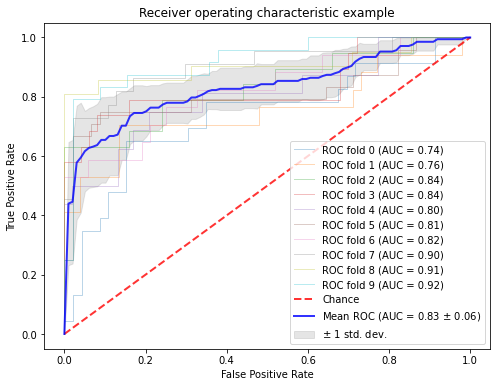

In [23]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = classifier_lr

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

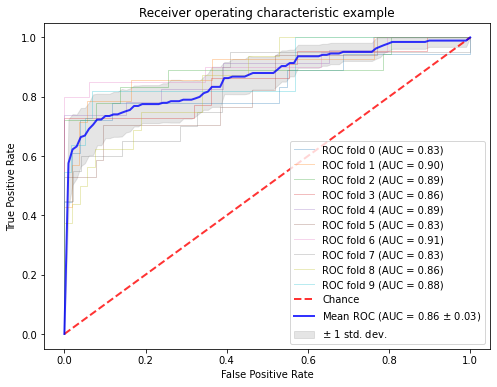

In [24]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = SVC(C= 20, kernel = 'linear')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
                 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

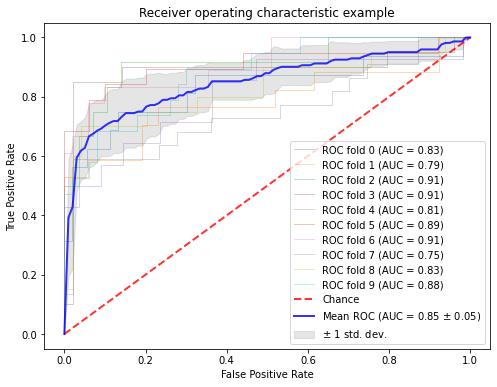

In [66]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = classifier_rf

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

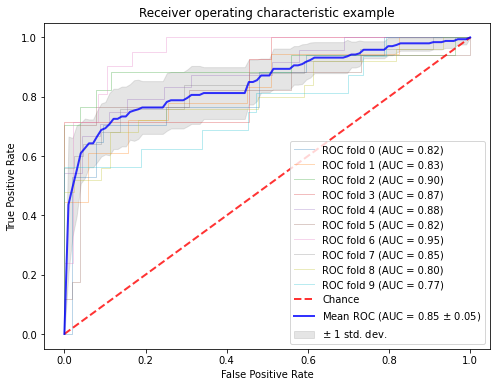

In [26]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

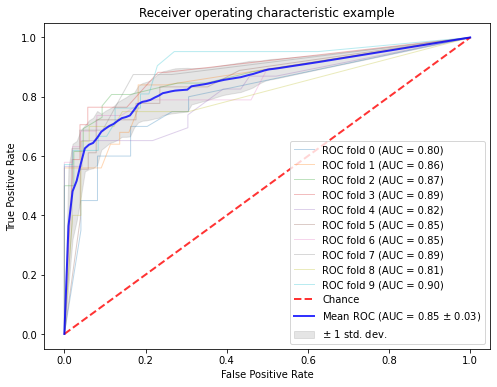

In [27]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()